In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt


In [2]:
data = sf.read('v1.wav')
df = np.array(data)
df =df[0]
v = pd.DataFrame(df)
v.info

<bound method DataFrame.info of                0         1
0       0.000000  0.000000
1       0.000000  0.000000
2       0.000000  0.000000
3       0.000000  0.000000
4       0.000000  0.000000
5       0.000000  0.000000
6       0.000000  0.000000
7       0.000000  0.000000
8       0.000000  0.000000
9       0.000000  0.000000
10      0.000000  0.000000
11      0.000000  0.000000
12      0.000000  0.000000
13      0.000000  0.000000
14      0.000000  0.000000
15      0.000000  0.000000
16      0.000000  0.000000
17      0.000000  0.000000
18      0.000000  0.000000
19      0.000000  0.000000
20      0.000000  0.000000
21      0.000000  0.000000
22      0.000000  0.000000
23      0.000000  0.000000
24      0.000000  0.000000
25      0.000000  0.000000
26      0.000000  0.000000
27      0.000000  0.000000
28      0.000000  0.000000
29      0.000000  0.000000
...          ...       ...
313314 -0.058533 -0.029846
313315 -0.061584 -0.028503
313316 -0.063843 -0.027344
313317 -0.065277 -0.026

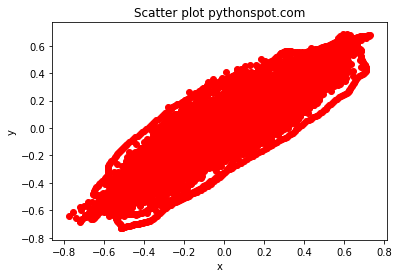

In [3]:
plt.scatter(v[0], v[1], c='red', alpha=1)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [54]:
from sklearn.cluster import KMeans

In [55]:
kmean = KMeans(n_clusters=10)

In [56]:
kmean.fit(v)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

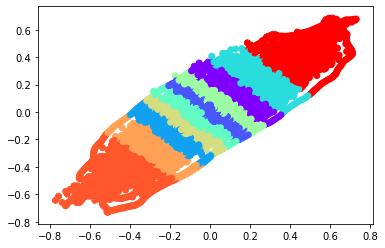

In [57]:
plt.scatter(v[0],v[1],c=kmean.labels_,cmap='rainbow')

In [58]:
kmean.cluster_centers_

array([[ 1.31833275e-01,  1.24068016e-01,  1.00000000e+00],
       [ 2.46260760e-03,  1.23929637e-03,  4.71733763e-13],
       [-1.78565774e-01, -1.64753966e-01,  2.00000000e+00],
       [ 2.35916890e-01,  2.20331858e-01,  1.00000000e+00],
       [-5.07375999e-02, -4.56241626e-02, -4.47308857e-13],
       [ 5.59927818e-02,  5.25620171e-02, -4.52748949e-13],
       [-1.12046093e-01, -1.05477092e-01,  2.00000000e+00],
       [-2.65340402e-01, -2.48688828e-01,  2.00000000e+00],
       [-4.14351523e-01, -3.99253915e-01,  2.00000000e+00],
       [ 4.15904440e-01,  3.82714552e-01,  1.00000000e+00]])

In [59]:
kmean.labels_

array([1, 1, 1, ..., 4, 4, 4])

In [66]:
kmean.predict(v)

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [67]:
pre = kmean.predict(v)

In [68]:
frame = pd.DataFrame(v)
frame['cluster'] = pre

In [69]:
frame = pd.get_dummies(frame['cluster'])
frame.head()
#0	2	5	6	7	8

,0,2,5,6,7,8
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [79]:
test = pd.DataFrame(v)
test['cluster'] = pre
test.head()

,0,1,cluster
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0


In [84]:
t1 = test['cluster' == 7]
# cl_1 = frame['cluster' == 1]
# cl_2 = frame['cluster' == 2]
# cl_3 = frame['cluster' == 3]
# cl_ = frame['cluster' == 3]

sd.play(t1)

In [135]:
cl_2 = test.loc[test['cluster'] == 4]
cl_2.drop('cluster', axis=1)
sd.play(cl_2.drop('cluster', axis=1))

In [108]:
# test['cluster' == 1]